##  Face recognition based on norm 2

#### In this project, I try to design a simple face recognition based on norm 2. the pictures of 40 person's face was taken in gray type.
#### Each person have a 10 defferent pictures and so our databas have a 200 pictures.

In [63]:
from PIL import Image
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math


In [64]:
xx=np.zeros((10304,200))
for i in range(1,41,1):
    for j in range(1,6,1):
        my_str= "orlfaces/s{}/{}.pgm".format(i,j)
        img= cv.imread(my_str, cv.IMREAD_GRAYSCALE)
        out = cv.normalize(img.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
        x=np.array(out)
        y=np.reshape(x,(10304,))
        xx[:,(i-1)*5+(j-1)]=y
        

<Figure size 432x288 with 0 Axes>

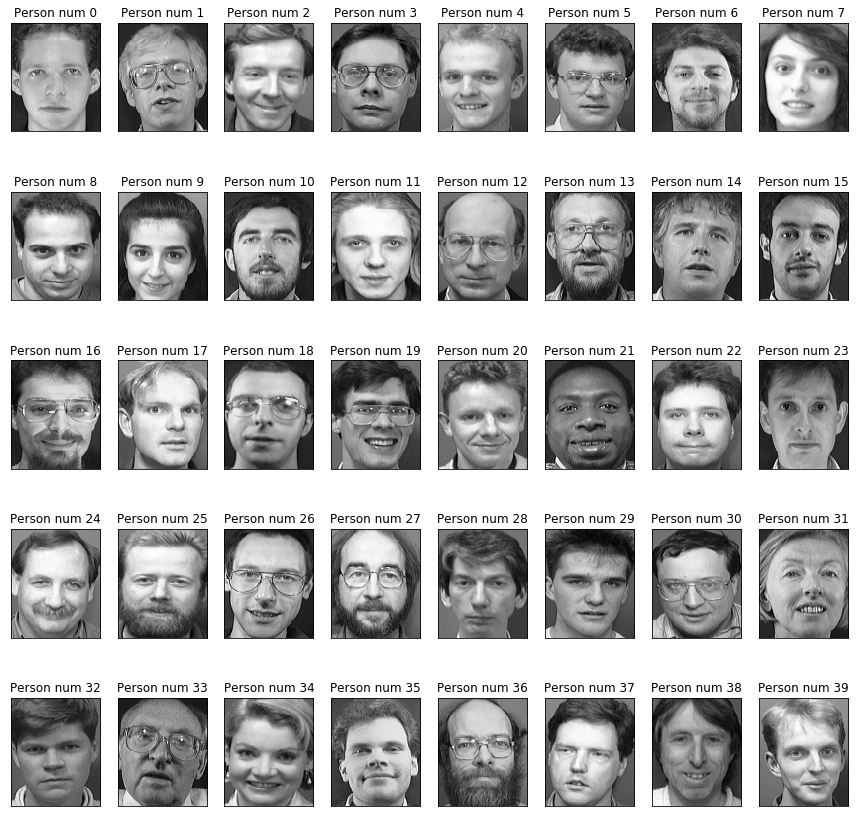

In [65]:
fig = plt.figure()
gs = fig.add_gridspec(5,8, hspace=0)
fig, axs = plt.subplots(5,8,figsize=(15,15))
#axs = gs.subplots()
idx=0
for i in range(5):
    for j in range(8):
        imm=xx[:, (i*8+j)*5]
        z1=np.reshape(imm,(112, 92))
    #print(i//5//)
        axs[i,j].imshow(z1, cmap='gray', vmin=0, vmax=1)
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        strs='Person num {}'.format(idx)
        axs[i,j].set_title(strs)
        idx+=1
    

please choose one of those persons by number[0 to 39]: 9


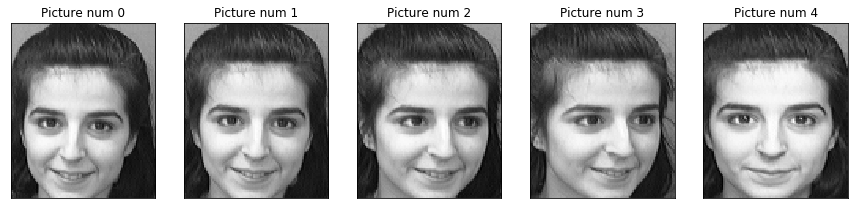

In [66]:
m=int(input("please choose one of those persons by number[0 to 39]: "))
fig, axs = plt.subplots(1,5,figsize=(15,15))
for i in range(5):
    
        imm=xx[:, int(m)*5+i ]
        z1=np.reshape(imm,(112, 92))
    #print(i//5//)
        axs[i].imshow(z1, cmap='gray', vmin=0, vmax=1)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        strs='Picture num {}'.format(i)
        axs[i].set_title(strs)
        
    

In [67]:
n=int(input("please choose one of those Picture by number[0 to 5]: "))

please choose one of those Picture by number[0 to 5]: 3


In [68]:
def minIndex(A):
    mi = 0
    for i in range(len(A)):
        if A[i] < A[mi]:
            mi = i
    return mi

You choosed this person:


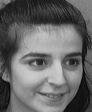

In [69]:
my_str= "orlfaces/s{}/{}.pgm".format(m+1,n+1)
my_pic5=Image.open(my_str)
print("You choosed this person:")
my_pic5

In [70]:

selected_image= cv.imread(my_str, cv.IMREAD_GRAYSCALE)
selected_image_normalize = cv.normalize(selected_image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)


In [71]:

selected_image_normalize=np.reshape(selected_image_normalize,(10304,))
selected_image_normalize.shape
selected_image_normalize=selected_image_normalize-selected_image_normalize.mean()

In [72]:
database_image=np.zeros((10304,200))
for i in range(1,40,1):
    for j in range(6,11,1):
        my_str= "orlfaces/s{}/{}.pgm".format(i,j)
        img= cv.imread(my_str, cv.IMREAD_GRAYSCALE)
        out = cv.normalize(img.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
        x=np.array(out)
        y=np.reshape(x,(10304,))
        database_image[:,(i-1)*5+(j-1)]=y
        


In [73]:
y=np.reshape(database_image.mean(0),(200,1))
z=np.ones((10304,1))
xxx=np.matmul(z,y.T)
TRAIN_mean_zero=database_image-xxx
L=np.zeros((200,1))
for i in range(200):
    yx=selected_image_normalize-TRAIN_mean_zero[:,i]
    L[i]=math.sqrt(np.matmul(yx.T,yx))
    
    


The algorithm recognizes this person:


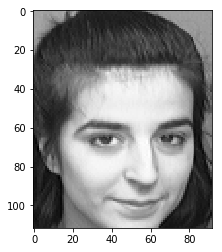

In [74]:
zzz=database_image[:, minIndex(L)]
zzzz=np.reshape(zzz,(112, 92))
zzzz
zx=zzzz*255
print("The algorithm recognizes this person:")
plt.imshow(zx, cmap='gray', vmin=0, vmax=255)